# Project: Healthcare
## predict heart attacks in an effective manner

### 1. Preliminary Analysis

a. Perform preliminary data inspection:

Load the dataset and inspect the structure using head(), info(), and describe() functions.
Check for missing values and duplicates.

In [3]:
import pandas as pd
data = pd.read_excel("HC.xlsx") # Load the dataset

In [4]:
print(data.head())

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1  


In [5]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB
None


In [6]:
print(data.describe())

              age         sex          cp    trestbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.366337    0.683168    0.966997  131.623762  246.264026    0.148515   
std      9.082101    0.466011    1.032052   17.538143   51.830751    0.356198   
min     29.000000    0.000000    0.000000   94.000000  126.000000    0.000000   
25%     47.500000    0.000000    0.000000  120.000000  211.000000    0.000000   
50%     55.000000    1.000000    1.000000  130.000000  240.000000    0.000000   
75%     61.000000    1.000000    2.000000  140.000000  274.500000    0.000000   
max     77.000000    1.000000    3.000000  200.000000  564.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope          ca  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean     0.528053  149.646865    0.326733    1.039604    1.399340    0.729373   
std      0.525860   22.9051

In [7]:
print(data.isnull().sum()) # CHECKING FOR NULL VALUES

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


In [8]:
print(data.duplicated().sum()) #checking for duplicate values

1


b. Remove duplicates and treat missing values:

If there are duplicates, remove them.
Choose an appropriate strategy to handle missing values, such as imputation or removal.

In [9]:
data = data.drop_duplicates() # Remove duplicates


In [10]:
data.fillna(data.mean(), inplace=True)# Treat missing values


### 2: Preparaing a Report about the Data

a. Get a preliminary statistical summary:

Use describe() to get measures of central tendencies and spread.

In [11]:
print(data.describe())

             age         sex          cp    trestbps        chol         fbs  \
count  302.00000  302.000000  302.000000  302.000000  302.000000  302.000000   
mean    54.42053    0.682119    0.963576  131.602649  246.500000    0.149007   
std      9.04797    0.466426    1.032044   17.563394   51.753489    0.356686   
min     29.00000    0.000000    0.000000   94.000000  126.000000    0.000000   
25%     48.00000    0.000000    0.000000  120.000000  211.000000    0.000000   
50%     55.50000    1.000000    1.000000  130.000000  240.500000    0.000000   
75%     61.00000    1.000000    2.000000  140.000000  274.750000    0.000000   
max     77.00000    1.000000    3.000000  200.000000  564.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope          ca  \
count  302.000000  302.000000  302.000000  302.000000  302.000000  302.000000   
mean     0.526490  149.569536    0.327815    1.043046    1.397351    0.718543   
std      0.526027   22.903527    0.4

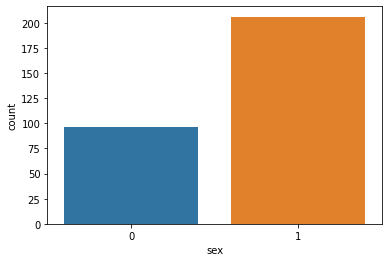

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='sex', data=data)
plt.show()


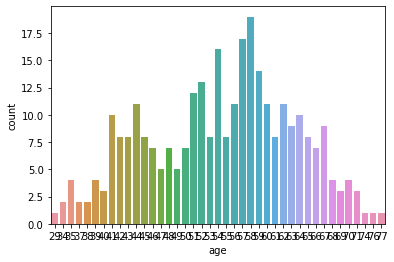

In [23]:
sns.countplot(x='age', data=data)
plt.show()
#plt.figure(figsize=(100, 10))

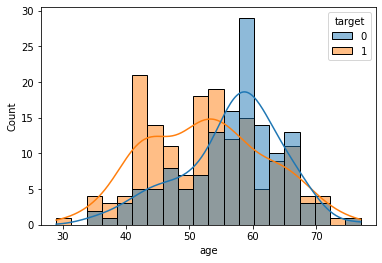

In [30]:
sns.histplot(x='age', hue='target', data=data, bins=20, kde=True)
plt.show() 
#The histogram provides an overview of how the distribution of ages is related to the occurrence of CVD

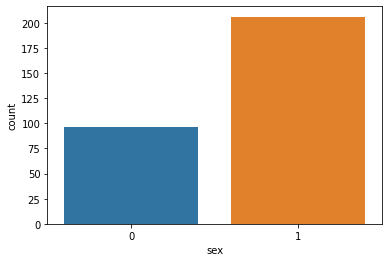

In [27]:
sns.countplot(x='sex', data=data)
plt.show()

([<matplotlib.patches.Wedge at 0x7f55a64eff70>,
 [Text(-0.9248160913746095, -0.5955797151805878, 'female'),
  Text(0.9248160913746093, 0.595579715180588, 'male')],
 [Text(-0.504445140749787, -0.3248616628257751, '68.2%'),
  Text(0.5044451407497869, 0.3248616628257753, '31.8%')])

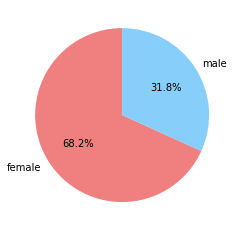

In [33]:
sex_distribution = data['sex'].value_counts()
labels = ['female', 'male']
colors = ['lightcoral', 'lightskyblue']

plt.pie(sex_distribution, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)

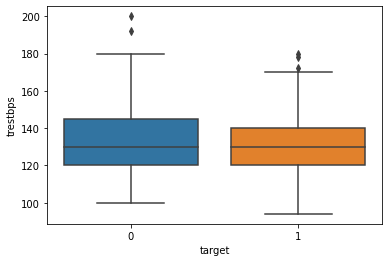

In [35]:
sns.boxplot(x='target', y='trestbps', data=data)
plt.show()

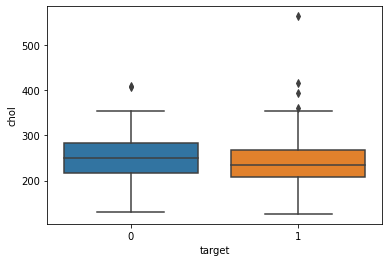

In [36]:
sns.boxplot(x='target', y='chol', data=data)
plt.show()

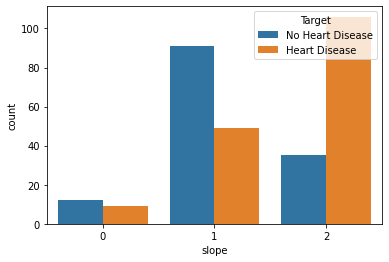

In [39]:
sns.countplot(x='slope', hue='target', data=data)
plt.legend(title='Target', labels=['No Heart Disease', 'Heart Disease'])
plt.show()

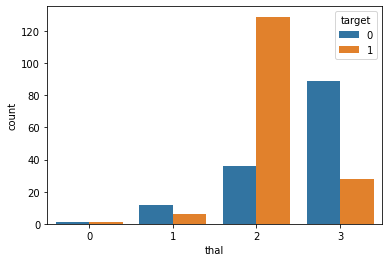

In [40]:
sns.countplot(x='thal', hue='target', data=data)
plt.show()

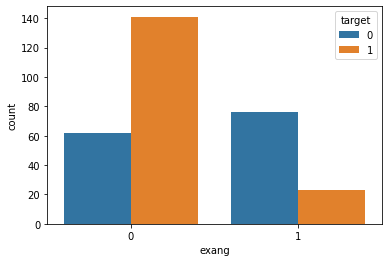

In [61]:
sns.countplot(x='exang', hue='target', data=data)
plt.show() #Exercise-induced angina and CVD

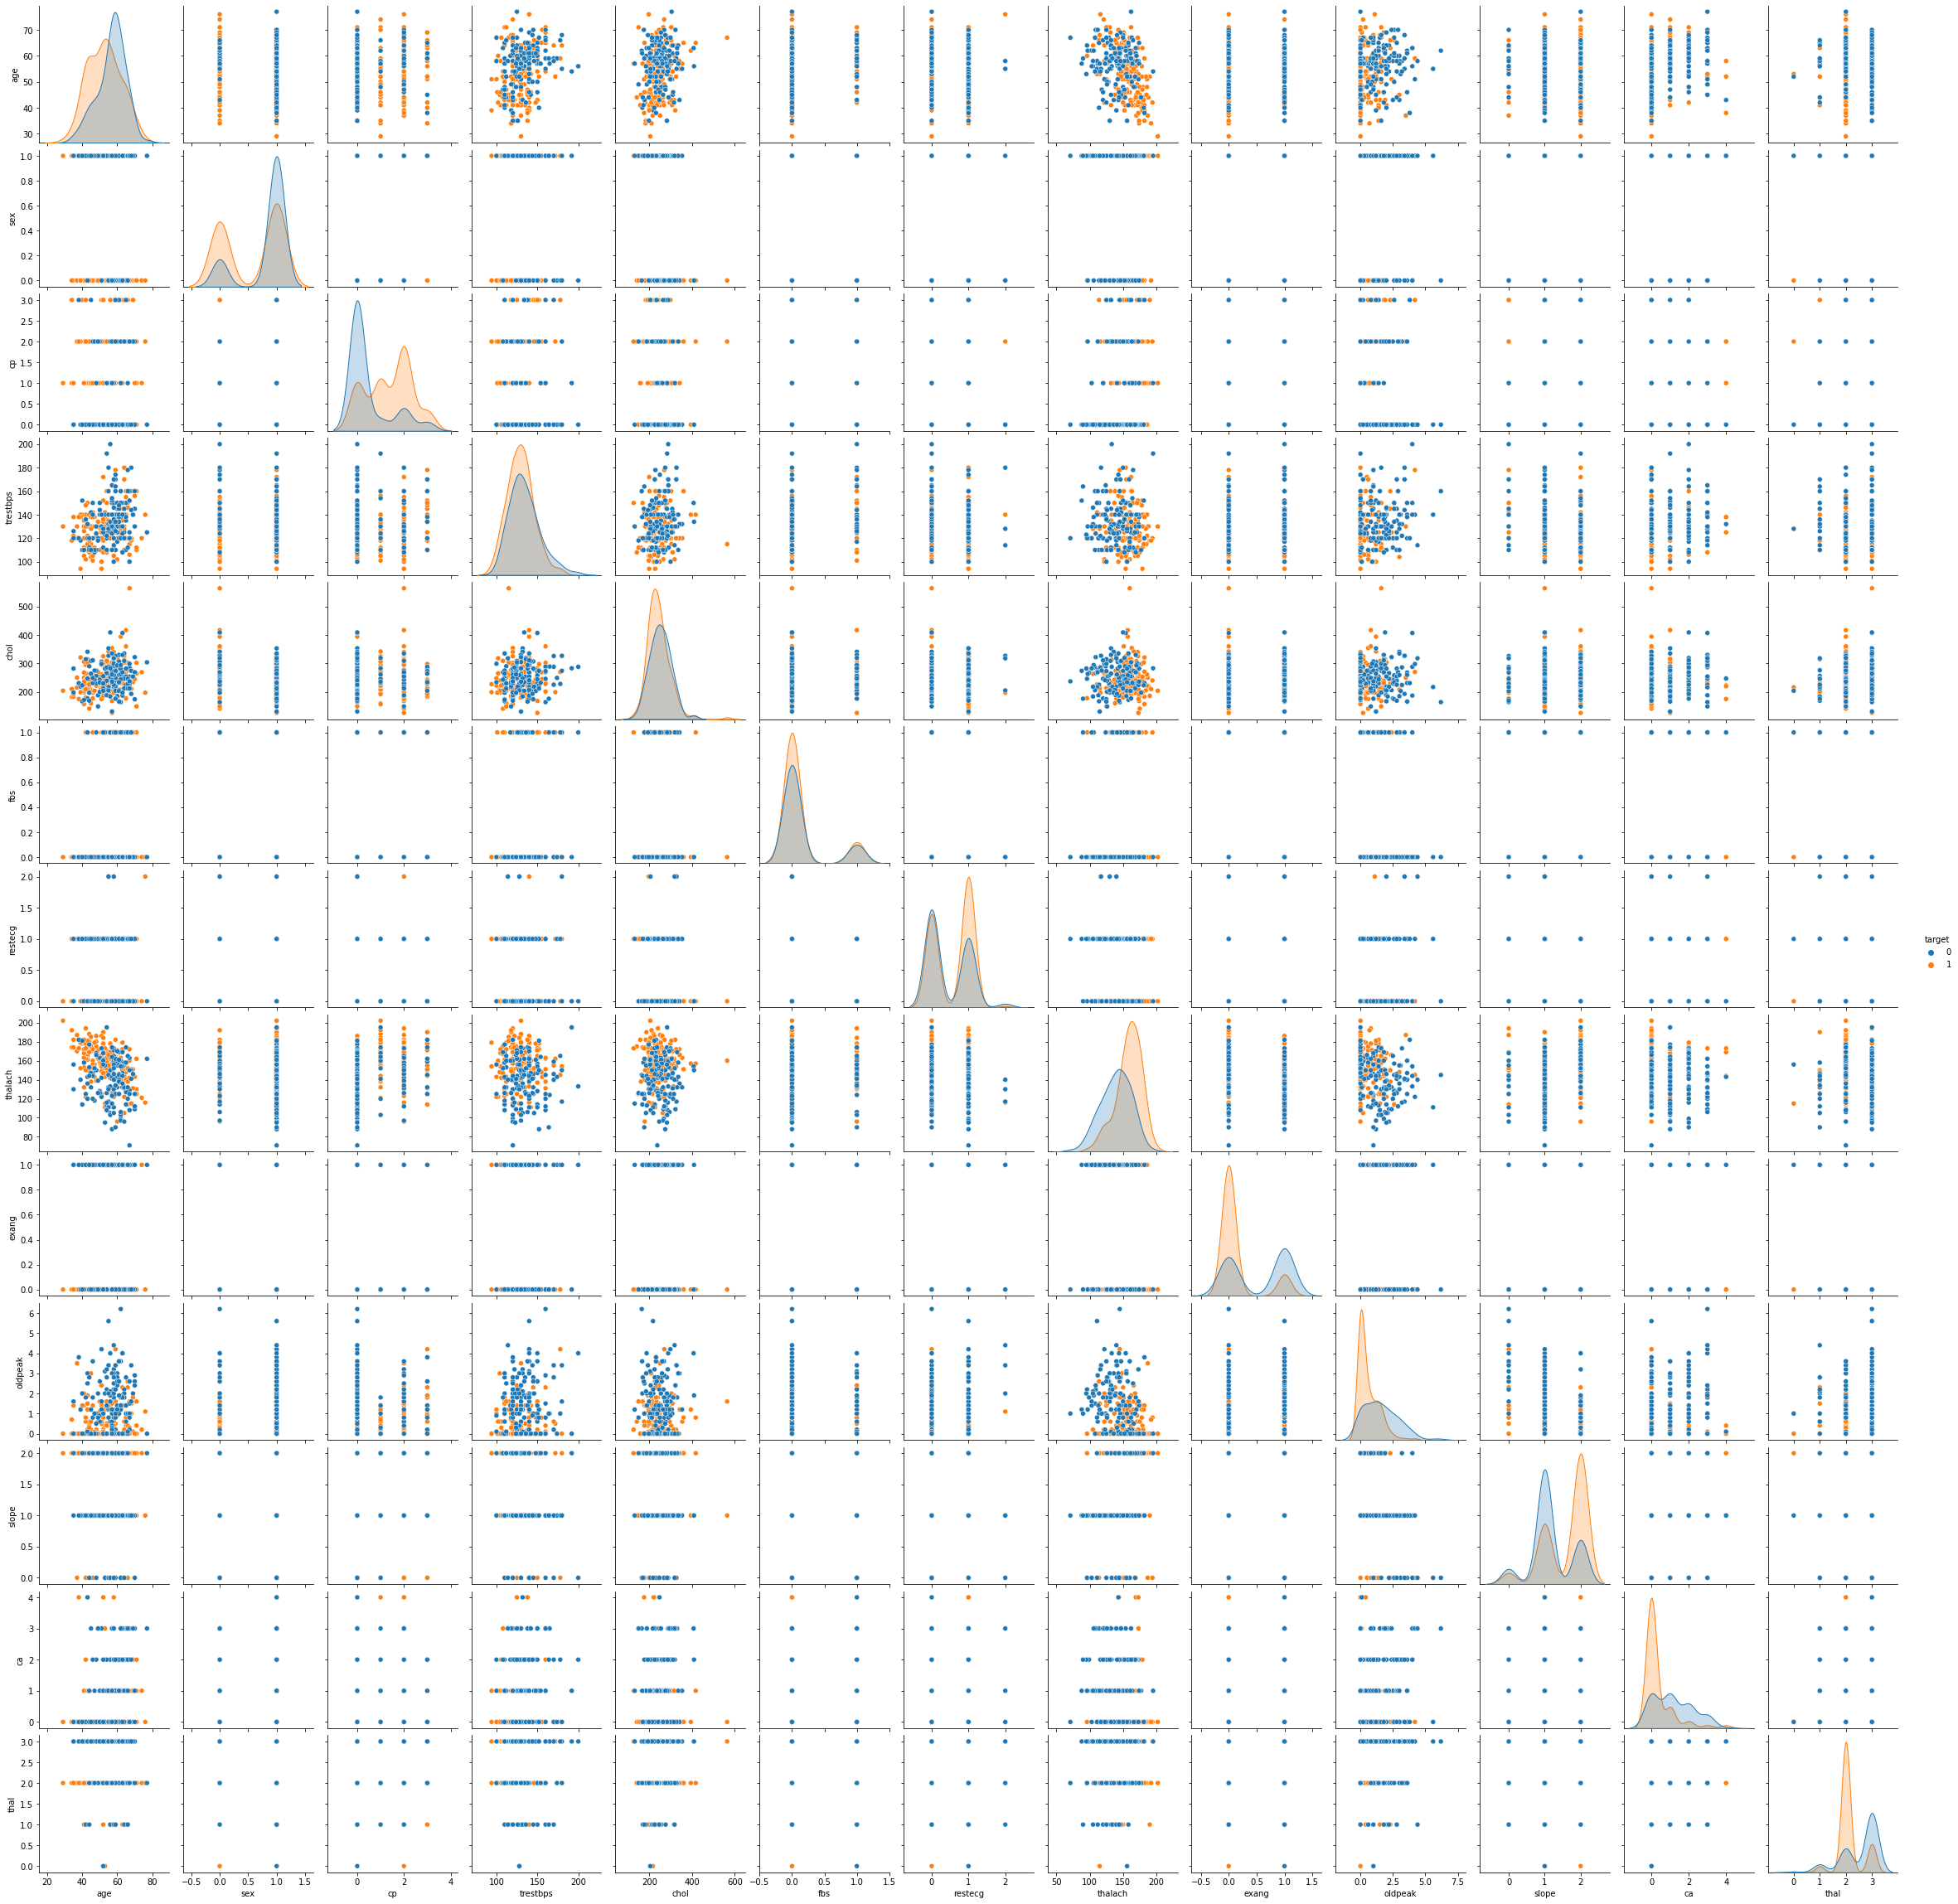

In [42]:
sns.pairplot(data, hue='target')
plt.show()

### 3: Build a Baseline Model

a. Logistic Regression:

Split data into train and test sets.
Build a logistic regression model.

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [44]:
X = data.drop('target', axis=1)
y = data['target']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [47]:
logreg = LogisticRegression(max_iter=1000)# Logistic Regression
logreg.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [49]:
y_pred = logreg.predict(X_test)# Predictions
print(y_pred)

[0 0 1 0 1 1 1 0 0 0 1 0 1 0 1 1 1 0 0 0 1 0 0 1 1 1 0 1 0 1 0 0 1 0 1 0 1
 1 1 1 0 1 1 1 1 0 1 1 0 0 0 0 1 1 0 0 0 1 0 1 1 1 0 0 1 1 1 1 1 0 1 1 1 1
 0 1 1 1 0 0 0 0 1 1 1 0 0 1 1 0 1]


In [50]:
from sklearn.metrics import accuracy_score, classification_report

In [51]:
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Logistic Regression Accuracy: 0.8241758241758241
              precision    recall  f1-score   support

           0       0.82      0.79      0.80        42
           1       0.82      0.86      0.84        49

    accuracy                           0.82        91
   macro avg       0.82      0.82      0.82        91
weighted avg       0.82      0.82      0.82        91



b. Random Forest:

Build a random forest model.

In [52]:
from sklearn.ensemble import RandomForestClassifier

In [53]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test) # Predictions

print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))


Random Forest Accuracy: 0.8571428571428571
              precision    recall  f1-score   support

           0       0.84      0.86      0.85        42
           1       0.88      0.86      0.87        49

    accuracy                           0.86        91
   macro avg       0.86      0.86      0.86        91
weighted avg       0.86      0.86      0.86        91



c. Feature Selection with Correlation Analysis and Logistic Regression:

Explore correlations between variables and target.
Use logistic regression for feature selection based on p-values.

In [54]:
import statsmodels.api as sm

X_train_const = sm.add_constant(X_train)

logit_model = sm.Logit(y_train, X_train_const)
result = logit_model.fit()

print(result.summary())

Optimization terminated successfully.
         Current function value: 0.330309
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                 target   No. Observations:                  211
Model:                          Logit   Df Residuals:                      197
Method:                           MLE   Df Model:                           13
Date:                Tue, 13 Feb 2024   Pseudo R-squ.:                  0.5207
Time:                        01:53:16   Log-Likelihood:                -69.695
converged:                       True   LL-Null:                       -145.40
Covariance Type:            nonrobust   LLR p-value:                 1.074e-25
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.0342      3.238      0.628      0.530      -4.313       8.381
age            0.0127      0.

In [56]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

y_pred_dt = dt.predict(X_test)

# Evaluationprint("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))

              precision    recall  f1-score   support

           0       0.79      0.88      0.83        42
           1       0.89      0.80      0.84        49

    accuracy                           0.84        91
   macro avg       0.84      0.84      0.84        91
weighted avg       0.84      0.84      0.84        91



In [59]:
# Model Stacking:Combine predictions from multiple models.

from sklearn.ensemble import StackingClassifier
from sklearn.tree import DecisionTreeClassifier

# Example Stacking Classifier
estimators = [('rf', RandomForestClassifier()), ('dt', DecisionTreeClassifier())]
stacking_model = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())
stacking_model.fit(X_train, y_train)

y = stacking_model.predict(X_test)

In [60]:
print(classification_report(y_test, y))

              precision    recall  f1-score   support

           0       0.82      0.86      0.84        42
           1       0.87      0.84      0.85        49

    accuracy                           0.85        91
   macro avg       0.85      0.85      0.85        91
weighted avg       0.85      0.85      0.85        91

